In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
df_police = pd.read_csv('./Datasets/police.csv')
df_population = pd.read_csv('./Datasets/population.csv')
df_race = pd.read_csv('./Datasets/race.csv')
population_2020 = 331449281

In [3]:
df_police

,name,age,gender,race,date_of_incident,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
0,Jose Oyuela-Palma,49,Male,Unknown race,9/21/2021,Henderson,NV,89002,Henderson Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
1,Trent Leach,30,Male,Unknown race,9/21/2021,Las Vegas,NV,89101,Las Vegas Metropolitan Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2,Phillip Lopez,42,Male,Unknown race,9/20/2021,Signal Hill,CA,90755,Signal Hill Police Department,Gunshot,No known charges,No,knife,attack,Allegedly Armed
3,Deon Ledet,30,Male,Black,9/20/2021,Houston,TX,77001,Houston Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
4,Jason Husted,47,Male,Unknown race,9/18/2021,West Ashley,SC,29414,Charleston County Sheriff's Office,Gunshot,No known charges,No,gun,attack,Allegedly Armed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,Andrew L. Closson,21,Male,White,1/1/2013,Gordon,WI,54838,Douglas County Sheriff's Office,Gunshot,No known charges,Drug or alcohol use,gun,other,Allegedly Armed
9092,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,93304,Bakersfield Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed
9093,Andrew Layton,26,Male,White,1/1/2013,Mankato,MN,56001,Mankato Department of Public Safety,Taser,No known charges,No,none,other,Unarmed/Did Not Have Actual Weapon
9094,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,81008,Pueblo Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed


In [4]:
df_population.head()

,state,abbreviation,population,lat,long
0,Alabama,AL,4903185,32.377716,-86.300568
1,Alaska,AK,731545,58.301598,-134.420212
2,Arizona,AZ,7278717,33.448143,-112.096962
3,Arkansas,AR,3017804,34.746613,-92.288986
4,California,CA,39512223,38.576668,-121.493629


In [5]:
df_race.head()

,race,percentage,population
0,White,0.763,252895801.0
1,Black,0.134,44414204.0
2,Hispanic,0.185,61318117.0
3,Unknown race,0.028,9280580.0
4,Asian,0.059,19555508.0


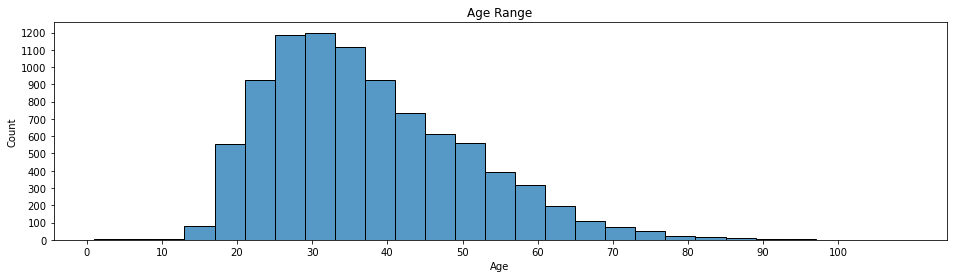

In [6]:
plt.figure(figsize=(16, 4))

age_plot = sns.histplot(data=df_police, x='age', binwidth=4)

age_plot.set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_plot.set_yticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])
age_plot.set_xticklabels([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_plot.set_yticklabels([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200])

age_plot.set_xlabel('Age')
age_plot.set_title('Age Range')

#plt.savefig('./age_plot.jpg')
plt.show()

In [8]:
# sns.catplot(data=df_police.sort_values(by='state'), x='state', kind='count',height=5, aspect=3)
# plt.show()

In [9]:
population_dict = {}
for city, num in zip(df_population['abbreviation'], df_population['population'] / 10000):
    population_dict[city] = num

In [19]:
percentage_dict = {'city': [], 'percentage': [], 'city_name': []}
for city in population_dict:
    percentage = df_police['state'].value_counts()[city] / population_dict[city] * 100
    percentage = round(percentage)
    percentage_dict['city'].append(city)
    percentage_dict['percentage'].append(percentage)



In [20]:
for state in df_population['state']:
    percentage_dict['city_name'].append(state)

percentage_dict['city_name']

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [11]:
df_percentage = pd.DataFrame.from_dict(percentage_dict)

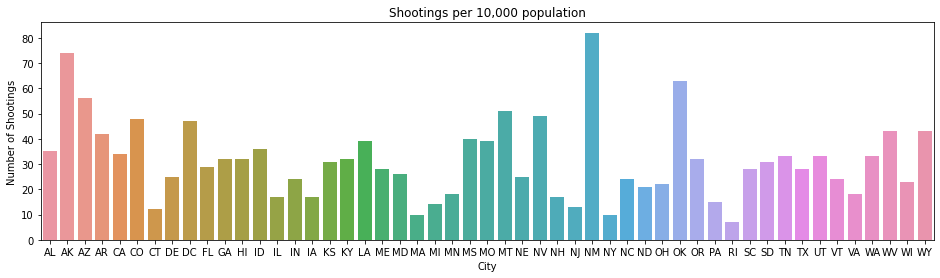

In [12]:
plt.figure(figsize=(16, 4))

percentage_plot = sns.barplot(data=df_percentage, x='city', y='percentage')
percentage_plot.set_title('Shootings per 10,000 population')
percentage_plot.set_xlabel('City')
percentage_plot.set_ylabel('Number of Shootings')

#plt.savefig('./Shootings_per_10000.jpg')
plt.show()

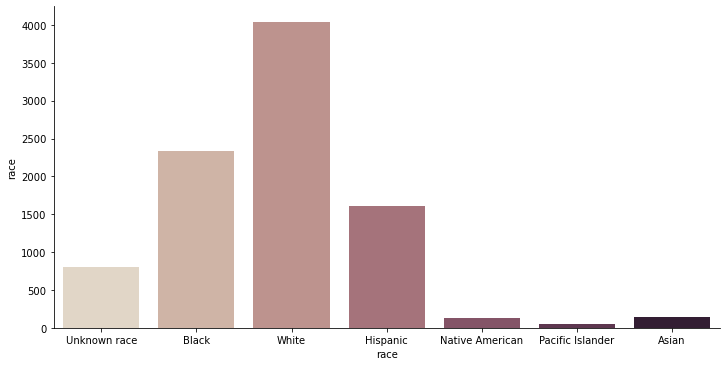

In [13]:
sns.catplot(data=df_police, x='race', kind="count", palette="ch:.25", height=5, aspect=2)

race_plot = sns.barplot(data=df_police, x='race', y=df_police['race'].value_counts().sort_values())
plt.show()

In [14]:
race_series = round((df_police['race'].value_counts().sort_values() / 9096) * 100, 2)
race_series = race_series.reset_index()
race_series.rename(columns={'index': 'race', 'race': 'percentage'}, inplace=True)
race_series

,race,percentage
0,Pacific Islander,0.60
1,Native American,1.41
2,Asian,1.52
3,Unknown race,8.76
4,Hispanic,17.63
5,Black,25.63
6,White,44.45


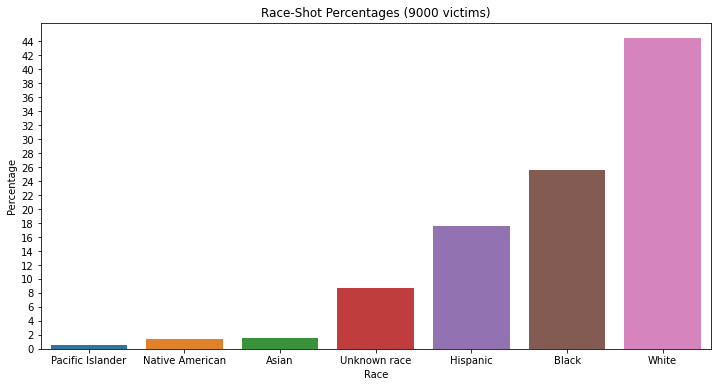

In [16]:
plt.figure(figsize=(12, 6))

race_plot = sns.barplot(data=race_series, x='race', y='percentage')

rand_a = np.arange(start=0, stop=46, step=2)

race_plot.set_yticks(rand_a)
race_plot.set_yticklabels(rand_a)

race_plot.set_title('Race-Shot Percentages (9000 victims)')
race_plot.set_xlabel('Race')
race_plot.set_ylabel('Percentage')

#plt.savefig('./race_percentages.jpg')
plt.show()

In [21]:
df_police

,name,age,gender,race,date_of_incident,city,state,zipcode,responsible_agency,cause_of_death,criminal_charges,mental_illness,alleged_weapon,alleged_threat_level,armed_or_unarmed
0,Jose Oyuela-Palma,49,Male,Unknown race,9/21/2021,Henderson,NV,89002,Henderson Police Department,Gunshot,No known charges,No,undetermined,other,Unclear
1,Trent Leach,30,Male,Unknown race,9/21/2021,Las Vegas,NV,89101,Las Vegas Metropolitan Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
2,Phillip Lopez,42,Male,Unknown race,9/20/2021,Signal Hill,CA,90755,Signal Hill Police Department,Gunshot,No known charges,No,knife,attack,Allegedly Armed
3,Deon Ledet,30,Male,Black,9/20/2021,Houston,TX,77001,Houston Police Department,Gunshot,No known charges,No,gun,attack,Allegedly Armed
4,Jason Husted,47,Male,Unknown race,9/18/2021,West Ashley,SC,29414,Charleston County Sheriff's Office,Gunshot,No known charges,No,gun,attack,Allegedly Armed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9091,Andrew L. Closson,21,Male,White,1/1/2013,Gordon,WI,54838,Douglas County Sheriff's Office,Gunshot,No known charges,Drug or alcohol use,gun,other,Allegedly Armed
9092,Abel Gurrola,26,Male,Hispanic,1/1/2013,Bakersfield,CA,93304,Bakersfield Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed
9093,Andrew Layton,26,Male,White,1/1/2013,Mankato,MN,56001,Mankato Department of Public Safety,Taser,No known charges,No,none,other,Unarmed/Did Not Have Actual Weapon
9094,Christopher Tavares,21,Male,Hispanic,1/1/2013,Pueblo,CO,81008,Pueblo Police Department,Gunshot,No known charges,No,gun,other,Allegedly Armed


In [25]:
weapon_series = df_police['alleged_weapon'].value_counts()

In [29]:
weapon_series = weapon_series.reset_index()

In [31]:
weapon_series.rename(columns={'index': 'weapon', 'alleged_weapon': 'count'}, inplace=True)

In [37]:
weapon_series.iloc[0:30]

,weapon,count
0,gun,4819
1,knife,1170
2,none,914
3,undetermined,600
4,vehicle,513
5,toy weapon,268
6,unknown weapon,110
7,vehicle,68
8,machete,66
9,sword,32


In [39]:
weapon_dict = {
    'weapon':['gun', 'knife', 'toy gun', 'baseball bat', 'hammer', 'ax', 'crossbow'],
    'count': [4847, 1193, 268, 431, 604, 242, 101]
}
df_weapon = pd.DataFrame.from_dict(weapon_dict)
df_weapon

,weapon,count
0,gun,4847
1,knife,1193
2,toy gun,268
3,baseball bat,431
4,hammer,604
5,ax,242
6,crossbow,101
